# Data example: Wernle 2018


In this notbook we provide easy example on how access to the experimental results such as Neural recording, behaviours, etc... 

    - To plot a tetrode recording call .plot_recording_tetr(index)
    - To plot the trajectory recording call .plot_trajectory(index)
    - To get access to the expeimental details call .show_keys()

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from sehec.experiments.wernle_2018_data import  WernleData, OnlineRateMap
import matplotlib.pyplot as plt

In [2]:
data = WernleData(verbose=False)

debug


Dataframe with recordings


,session,recorded_vars,before_merge
rec_index,,,
0,0,"[time, posx, posy, speed_index, spikes]",False
1,0,"[time, posx, posy, speed_index]",True
2,1,"[time, posx, posy, speed_index, spikes]",False
3,1,"[time, posx, posy, speed_index]",True
4,2,"[time, posx, posy, speed_index, spikes]",False
...,...,...,...
289,125,ratemap,False
290,126,ratemap,True
291,126,ratemap,False


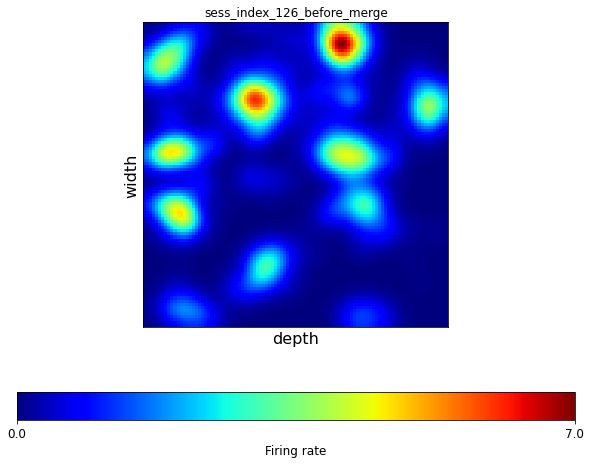

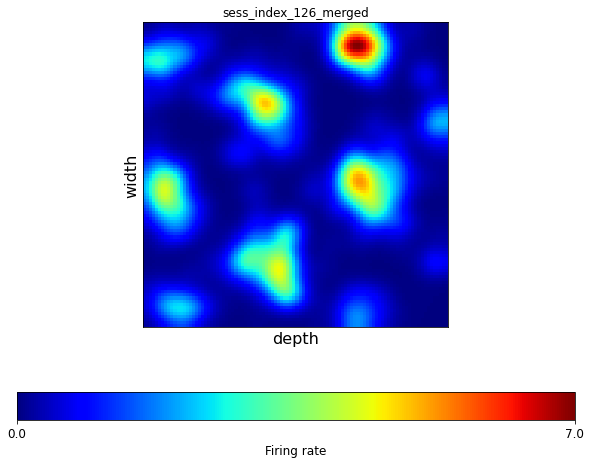

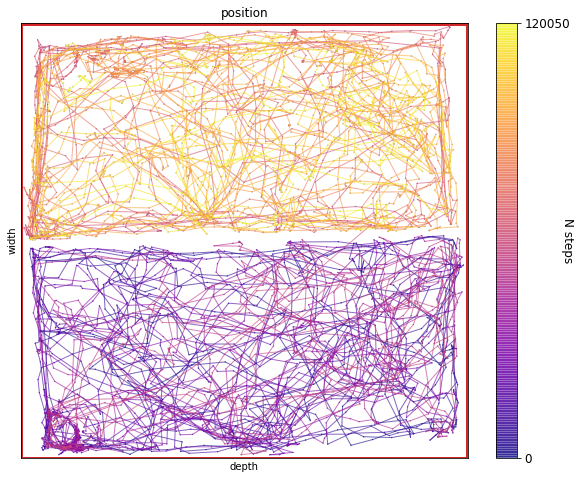

In [3]:
data.show_data()
data.plot_recording_tetr(290)
data.plot_recording_tetr(291)
data.plot_trajectory(2)

/home/rodrigo/SSD/Projects/EHC_model_comparison/sehec/experiments/wernle_2018_data.py:206: UserWarning: This index does not have position data
  warnings.warn("This index does not have position data")


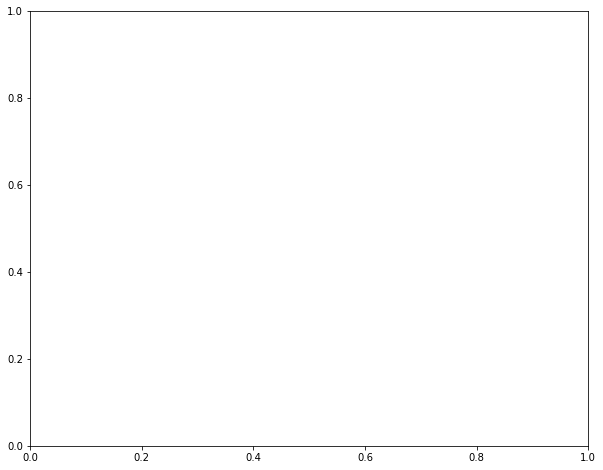

In [4]:
data.plot_trajectory(290)

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

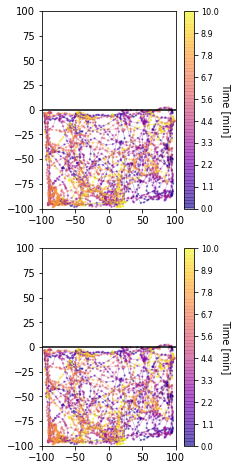

In [5]:
data.plot_development(n_cells=2, time_interval=(0, 10), skip_every=10)

array([[<AxesSubplot:title={'center':'Before merging'}>,
        <AxesSubplot:title={'center':'After merging'}>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

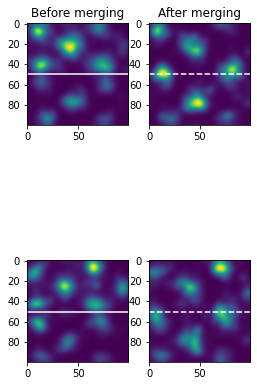

In [6]:
data.plot_cell_comparison(session_index=(125, 126))


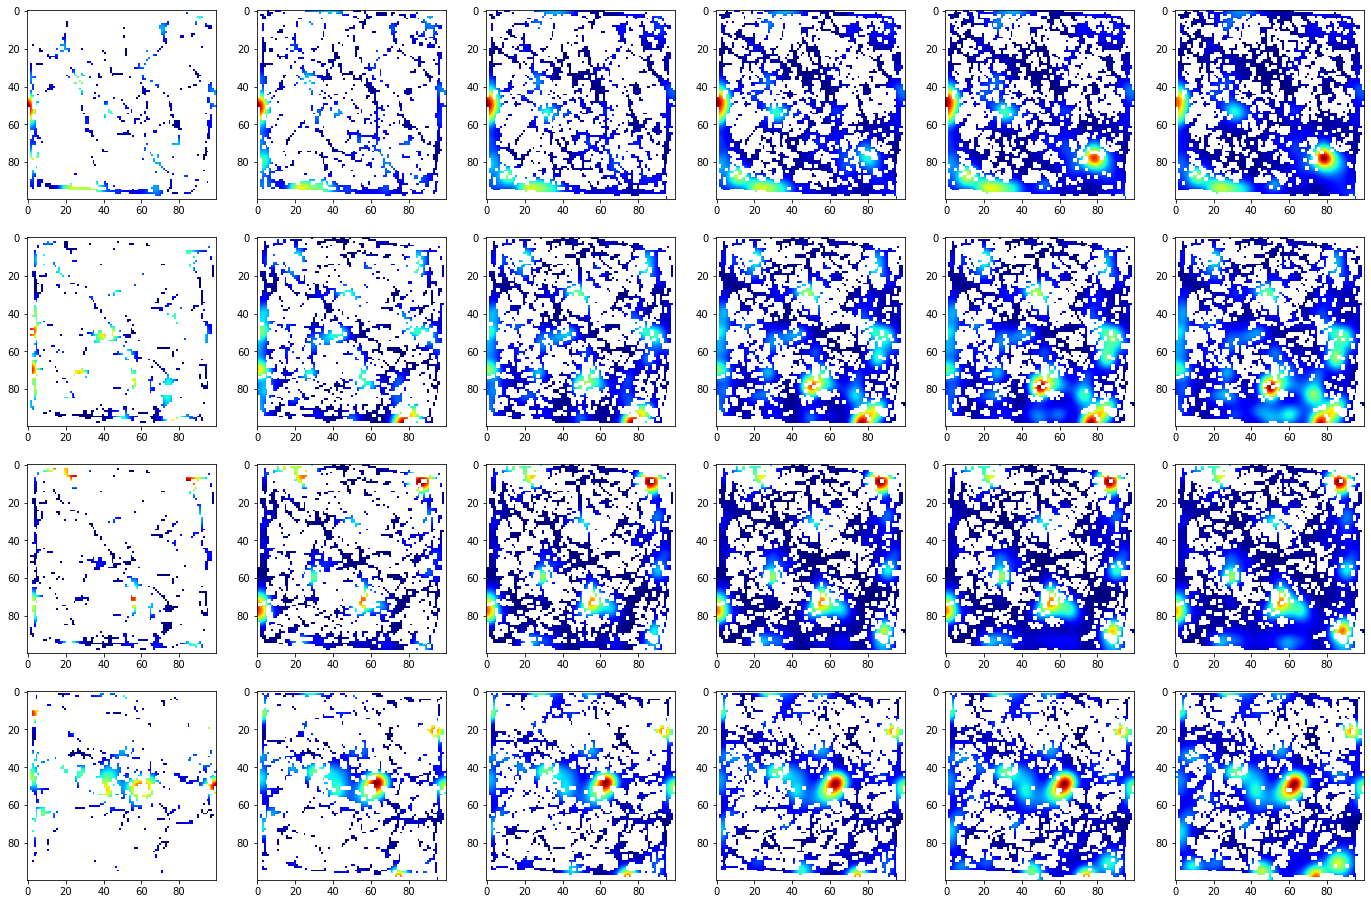

In [7]:
f, ax = plt.subplots(4, 6, figsize=(4*6, 4*4))
for j in range(4):
    spikes = data.spikes_AB[j+5, 0][:, 0]
    pos = data.pos_AB[j+5, 0]
    ratemap = OnlineRateMap(spikes=spikes, position=pos, size=(100, 100))
    for i in range(6):
        rm = ratemap.update_ratemap(dt=5*60, interp_factor=1)
        ax[j, i].imshow(rm, cmap="jet")

plt.show()